In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Our directories
DATA_DIR = '/content/drive/MyDrive/'
LABELED_OUTPUT_DIR = DATA_DIR + 'label_preprocess/images_training_rev1/'

In [6]:
LABELED_OUTPUT_DIR_FINAL = DATA_DIR + 'label_preprocess/final/'

In [3]:
# Import
import cv2
import os
import numpy as np

In [4]:
import random

In [5]:
from google.colab.patches import cv2_imshow

In [6]:
import matplotlib.pyplot as plt

In [7]:
import matplotlib.image as mpimg

In [5]:
# Let's view avg labelled images from 3 classes - to decide cropping

10 Discs:

205103.png
951202.png
715106.png
391334.png
767960.png
278752.png
554126.png
975491.png
675141.png
381307.png

10 rounds:

565069.png
383087.png
984675.png
296651.png
738958.png
907744.png
468274.png
884380.png
421342.png
303267.png

10 others:

613205.png
691771.png
986380.png
112119.png
512358.png  
609355.png
899164.png
847371.png
186465.png
721408.png

In [79]:
def load_and_average_images(directory=LABELED_OUTPUT_DIR_FINAL, fnames=None):
    images = []
    for filename in fnames:
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)

    if images:
        average_image = np.mean(images, axis=0, dtype=np.uint8)
        return average_image
    else:
        return None

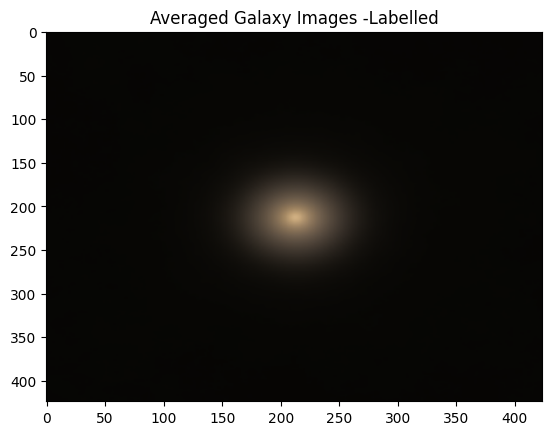

In [66]:
fnames=[f for f in os.listdir(LABELED_OUTPUT_DIR)]
arr = np.array([ plt.imread(LABELED_OUTPUT_DIR + pic, format='jpg') for pic in fnames])
plt.title('Averaged Galaxy Images -Labelled')
average_galaxy_img=np.average(arr, axis=0).astype(int)
plt.imshow(average_galaxy_img, aspect='auto')

## Majority is dark space with target galaxy to classify at centre - suggesting we can largely crop the images to save space and our models to work on object of interest.

## How do we find the largest contour before we crop?

The find_largest_contour function is designed to find the bounding rectangle (ROI) of the largest contour in a given image. It uses OpenCV to convert the image to grayscale, apply a threshold to create a binary image, and then find contours in that binary image. The function then iterates over the contours, calculates the area of each contour's bounding rectangle, and keeps track of the largest contour's bounding rectangle.

In [68]:
def find_largest_contour(image):
    # Convert the image to 8-bit depth
    image = cv2.convertScaleAbs(image)

    # Convert the image to grayscale
    im_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply threshold
    ret, thresh = cv2.threshold(im_gray, 10, 255, 0)

    # Find contours
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

    ROI = (0, 0, 0, 0)
    ROI_area = 0

    for contour in contours:
        x, y, width, height = cv2.boundingRect(contour)
        area = width * height
        if area > ROI_area:
            ROI_area = area
            ROI = (x, y, width, height)

    return ROI

In [69]:
ROI = find_largest_contour(average_galaxy_img)

In [73]:
# Draw a green rectangle on the averaged image
x, y, width, height = ROI
print(x,y,width,height)

130 130 169 167


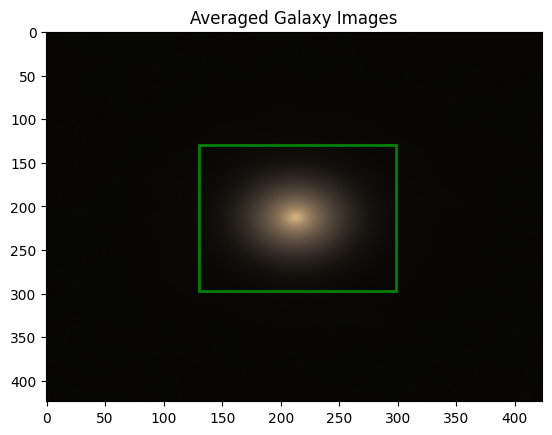

In [74]:
plt.imshow(average_galaxy_img, aspect='auto')
plt.gca().add_patch(plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='g', facecolor='none'))
plt.title('Averaged Galaxy Images')
plt.show()

In [ ]:
#discs_avg_img=load_and_average_images(fnames=)

In [37]:
np.unique(discs_avg_img )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25], dtype=uint8)

<ipython-input-58-eaba57601a7b>:1: RuntimeWarning: divide by zero encountered in log
  discs_avg_img_log = np.log(discs_avg_img.astype(np.float32))


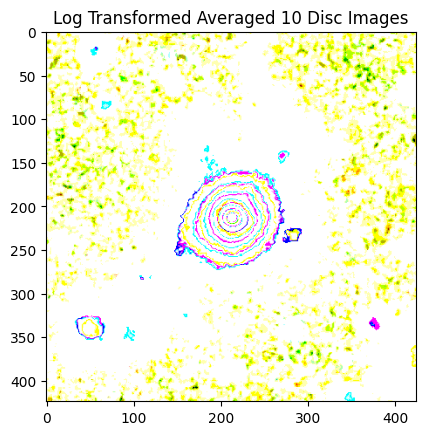

In [58]:
discs_avg_img_log = np.log(discs_avg_img.astype(np.float32))
plt.imshow(cv2.cvtColor(discs_avg_img_log, cv2.COLOR_BGR2RGB))
plt.title('Log Transformed Averaged 10 Disc Images')
plt.show()

<ipython-input-76-7003cc51ce98>:3: RuntimeWarning: divide by zero encountered in log
  round_avg_img_log = np.log(round_avg_img.astype(np.float32))


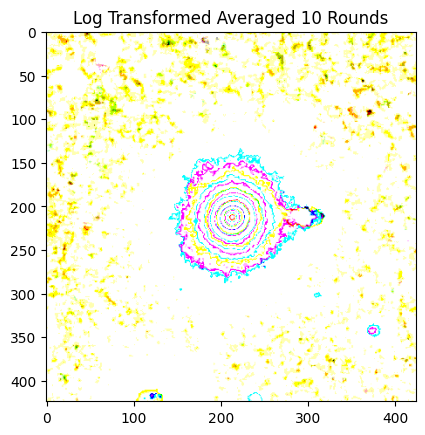

In [76]:
round_fnames=['565069.jpg','383087.jpg','984675.jpg','296651.jpg','738958.jpg','907744.jpg','468274.jpg','884380.jpg','421342.jpg','303267.jpg']
round_avg_img=load_and_average_images(fnames=round_fnames)
round_avg_img_log = np.log(round_avg_img.astype(np.float32))
plt.imshow(cv2.cvtColor(round_avg_img_log, cv2.COLOR_BGR2RGB))
plt.title('Log Transformed Averaged 10 Rounds')
plt.show()

In [12]:
# List of image classes and their images
image_classes = ["Discs", "Rounds", "Others"]
image_files = {
    "Discs": ["578574.jpg","269261.jpg","338230.jpg","889854.jpg","123897.jpg"],
    "Rounds": ["200225.jpg","786342.jpg","701842.jpg","464874.jpg","362072.jpg"],
    "Others": ["186598.jpg","455121.jpg","980977.jpg","475653.jpg","237065.jpg"]
}

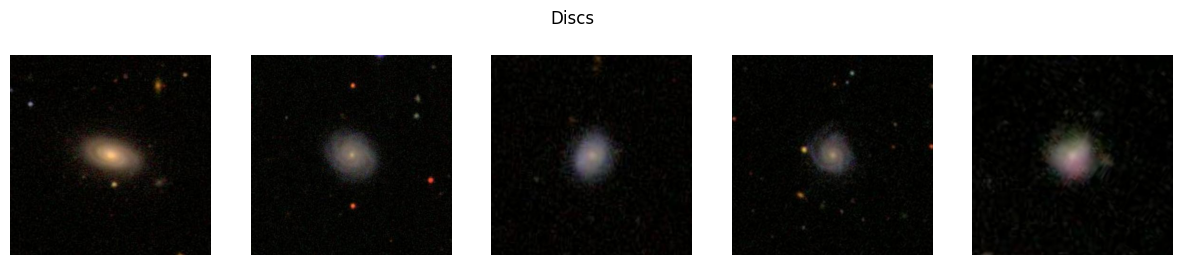

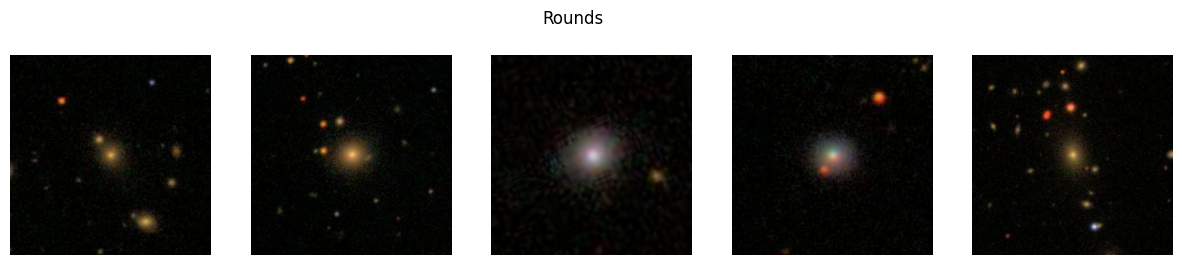

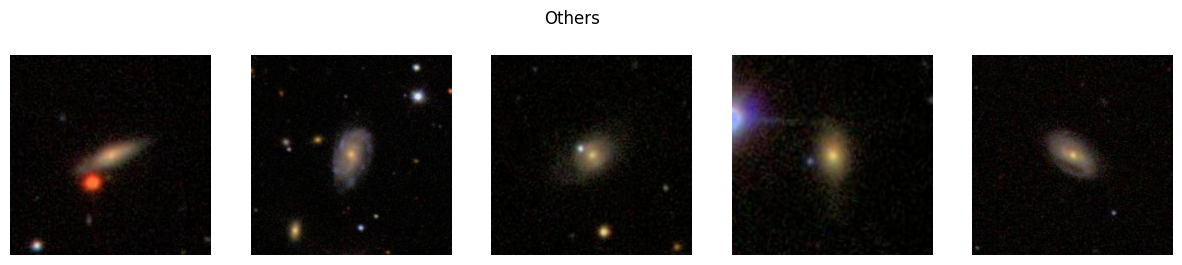

In [13]:
# Display images for each class
for class_name, images in image_files.items():
    plt.figure(figsize=(15, 3))
    plt.suptitle(class_name)

    for i, image in enumerate(images, start=1):
      try:

        img_path = os.path.join(LABELED_OUTPUT_DIR, image)
        plt.subplot(1, len(images), i)
        plt.imshow(mpimg.imread(img_path))
        plt.axis('off')
      except:
        pass

    plt.show()